In [1]:
import pandas as pd
import missingno as msno
from data_preprocessing import preprocessing

data = pd.read_csv("../../data/data.csv")

<Axes: >

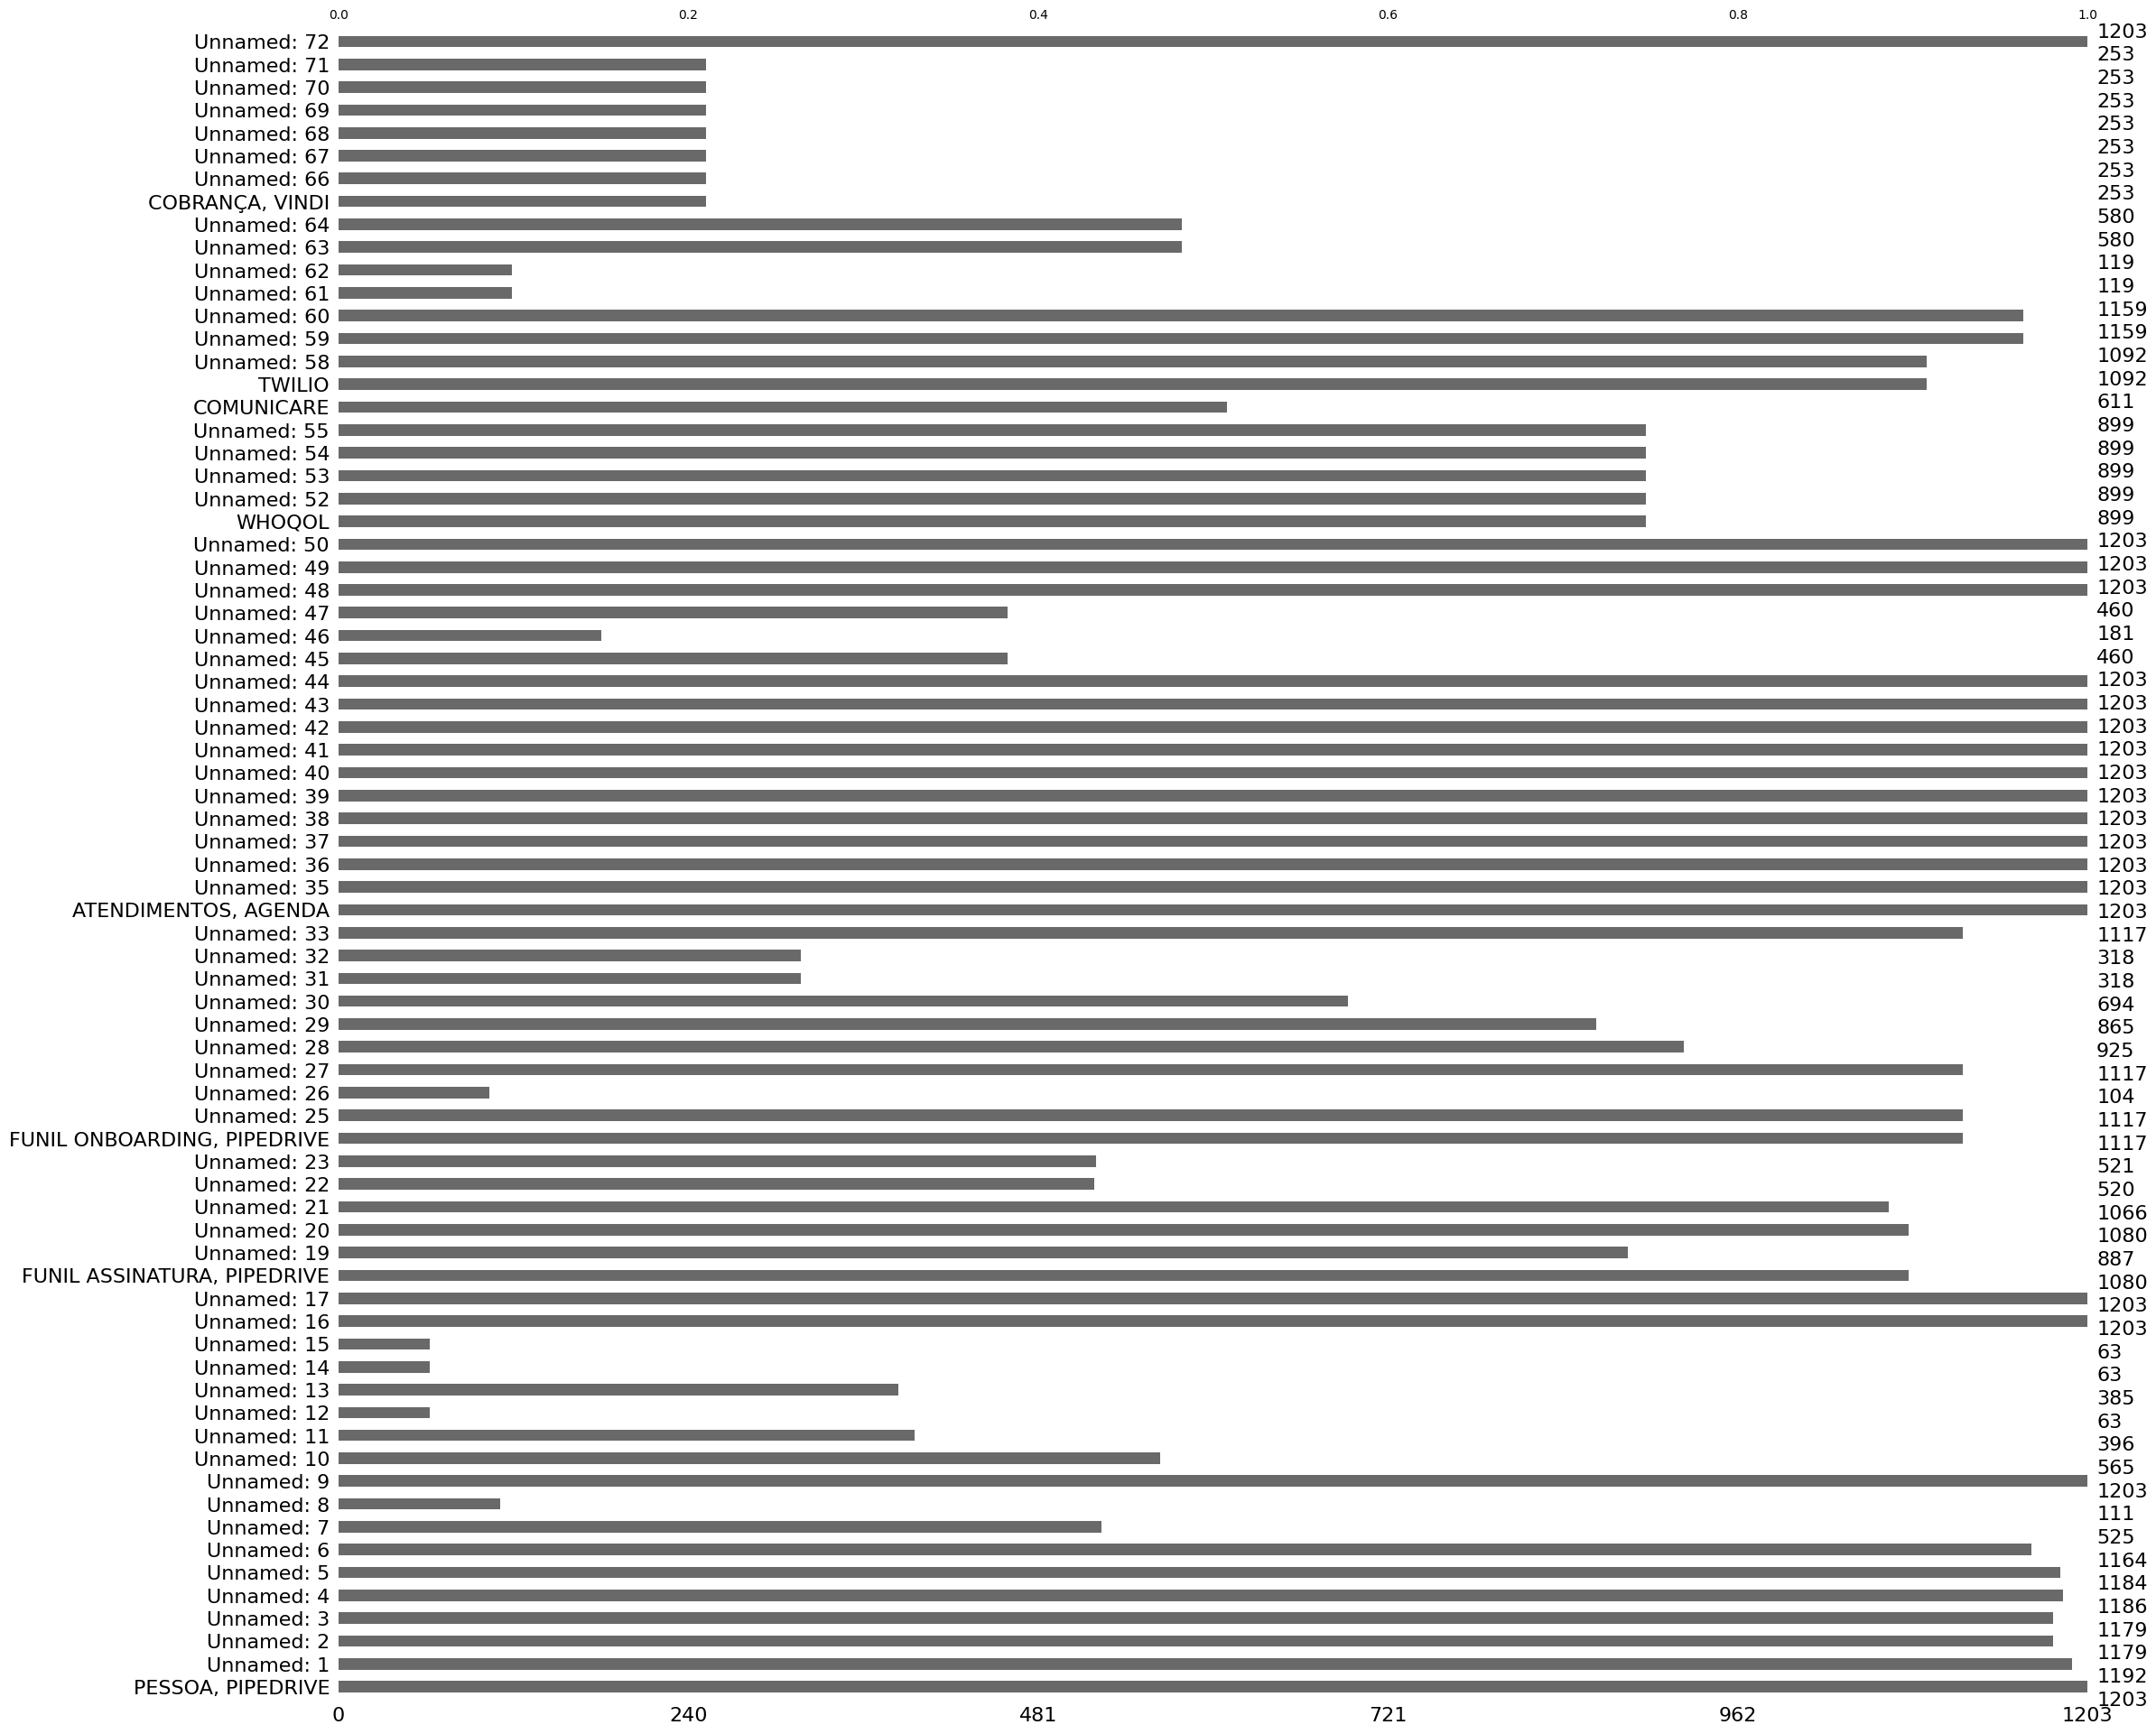

In [2]:
msno.bar(data)

In [3]:
data = preprocessing(data)

<Axes: ylabel='0'>

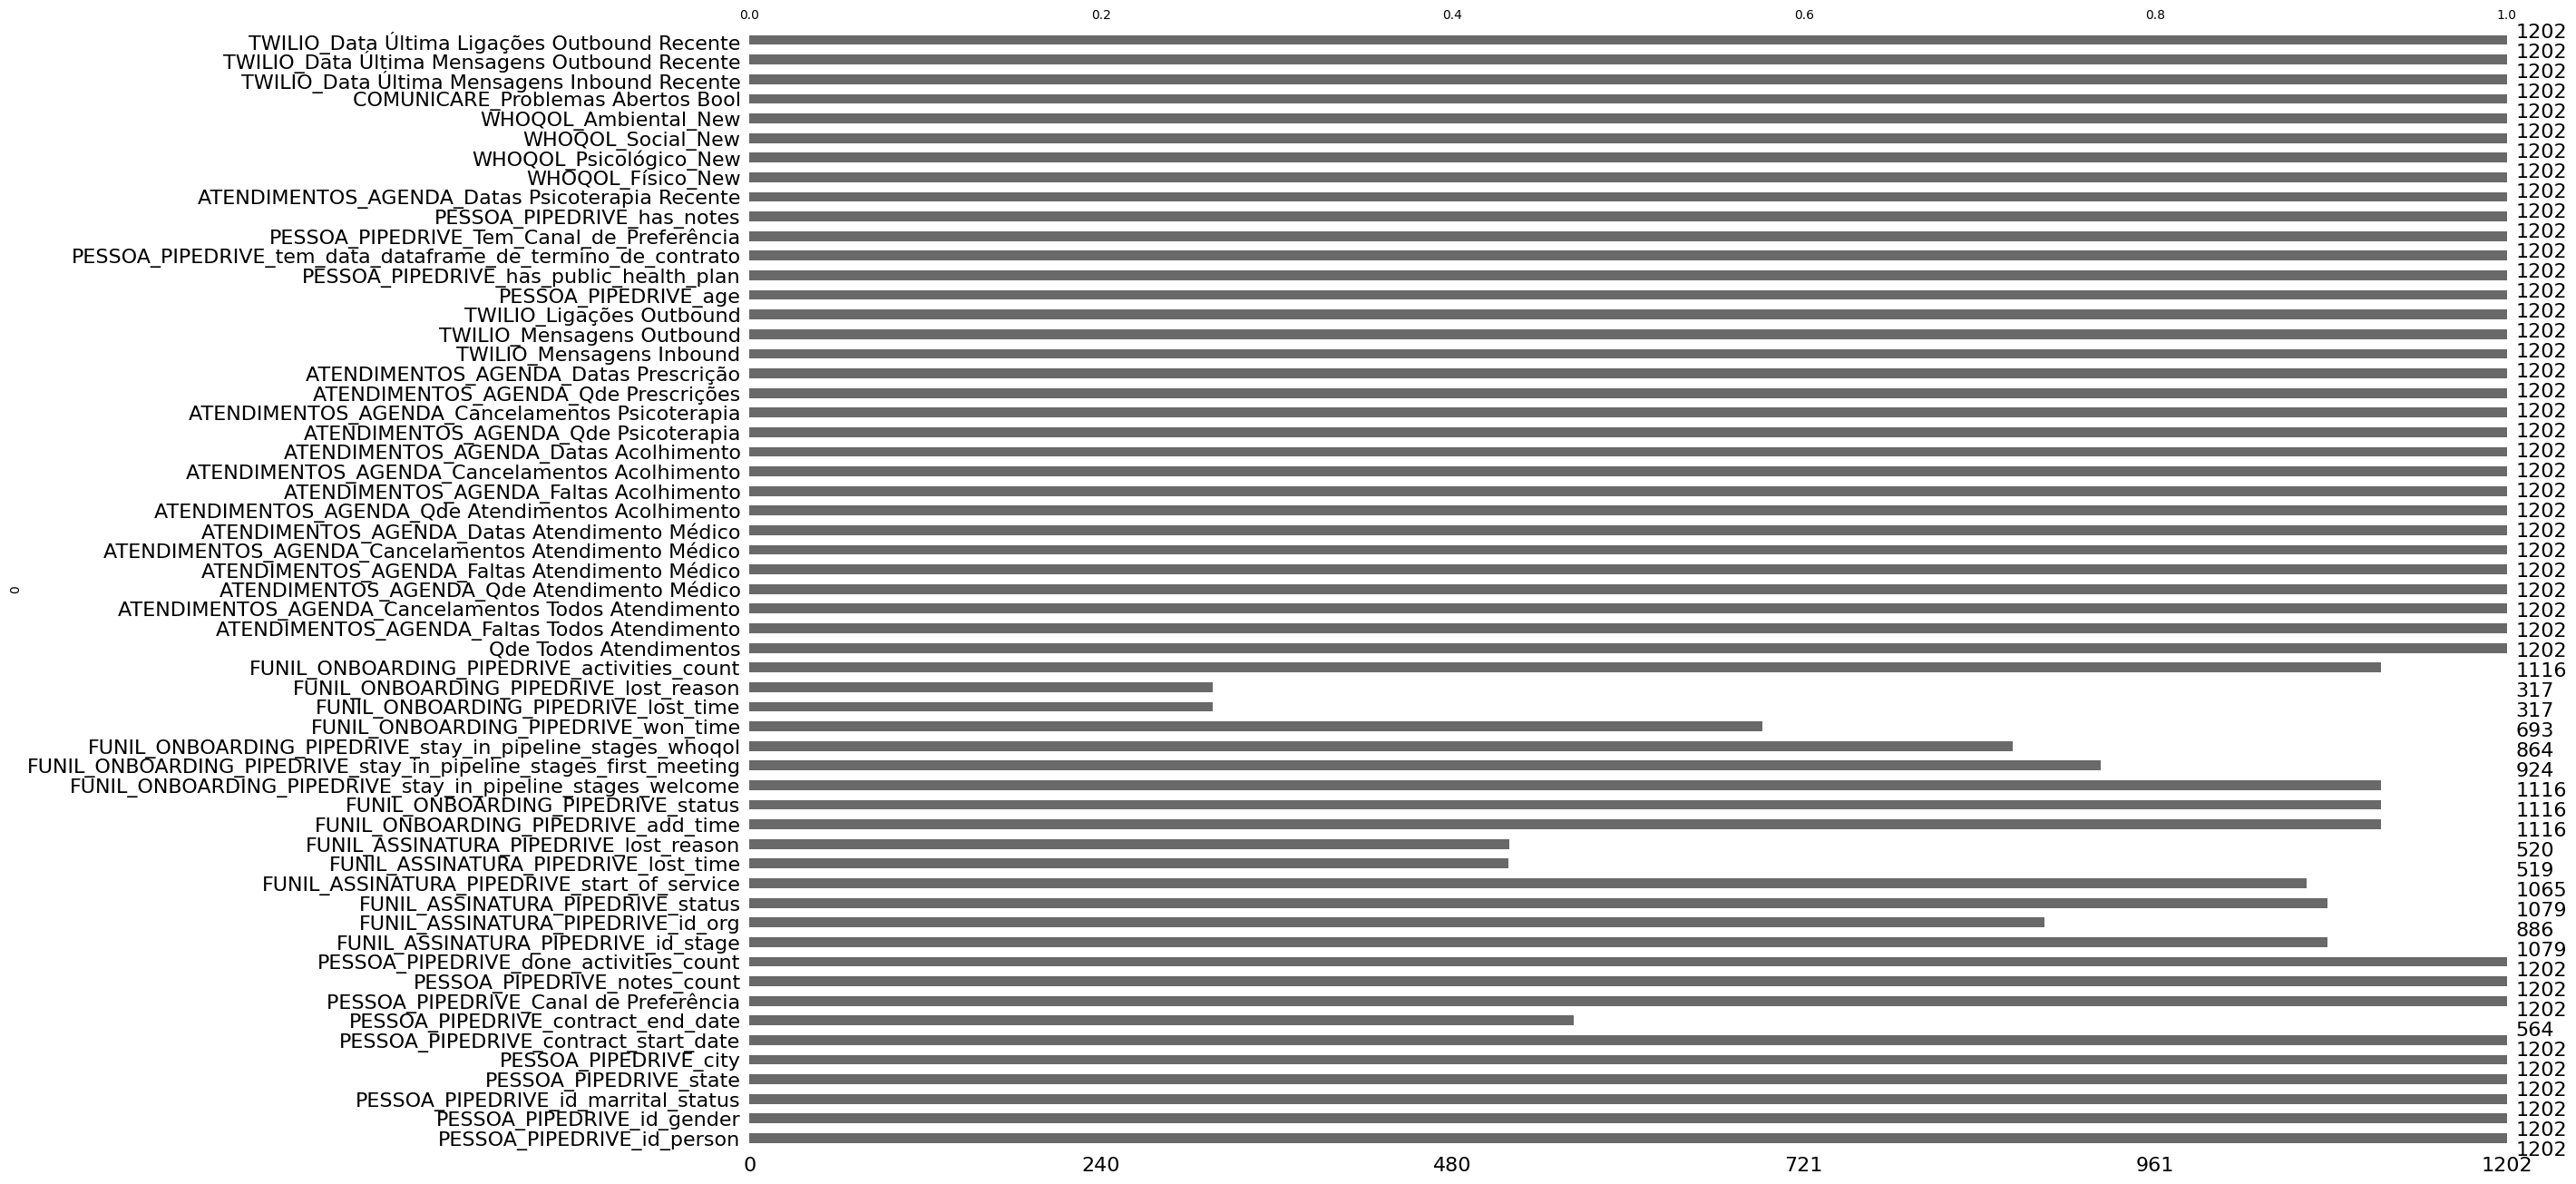

In [4]:
msno.bar(data)